# my_database_script
Here I will create some basic plots for my_database. This script is also in the my_database repository. So I wont load any functions from my personal ``functions.py``. The idea of this notebook is to get an overview of the data, which comes directly from the DTS device, without processesing.

I edit this notebook in my own script structure and will overwrite the version in sciebo, when I add new features.

When uploading to sciebo, I need to:
* upload this notebook
* upload my_func_mvw.functions_import_my_database
* upload the databse of csv and pickle

I should create a bash script for that, in the future --> command line sciebo support

## To-do
* meas per day plot hinzufügen
* bash script
* hochladen, daniel mail schreiben

In [1]:
# I think at the moment not all of these are used - only if I implement the measearurements per day calcukations here
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")
from collections import defaultdict
import glob
from collections import Counter
import matplotlib.patches as patches
import matplotlib.dates as mdates
from shutil import copy2 as copy_file
from matplotlib import colors
from datetime import date, timedelta

# import functions I created
from my_func_mvw.functions_import_my_database import import_my_database_pickle, import_my_database_2018_pickle, import_my_database_csv, import_my_database_2018_csv

print("Some Version information of the imported packages")
# from Phillip Stoffels script: Update Pandas if necessary. Pickle has compatibility problem with pandas 0.23.4: get update if error occurs. \ conda powershell prompt: pip install --upgrade pandas
print(f"pandas: {pd.__version__}")
print(f"pickle: {pickle.format_version}")
!python --version

Some Version information of the imported packages
pandas: 1.2.3
pickle: 4.0
Python 3.8.8


# Input

In [2]:
#######Input###############
# change it to r".\" if you are executing this notebook directly in the my_database folder
path_to_my_database = r"..\Alsdorf\Daten\my_database" #r".\\"
#plot_save   = False    # True False - für später
import_type = "pickle" # "csv" "pickle"
# some checks of the data, e.g. nan values
check = True # True False
############################

# To-DO
# check if pickle and csv data are perfectly equal (also regarding the format)
# create a seperate notebook for checks of my_database? Check if cable length changes 

# Import Data

In [3]:
%%time
# Wall time: 10.6 s
# Load pickle data
if import_type == "pickle":
    # Load Data 2019+
    path_to_my_database_pickle = path_to_my_database + r"\pickle"

    data_2021 = import_my_database_pickle(2021, path_to_my_database_pickle)
    data_2020 = import_my_database_pickle(2020, path_to_my_database_pickle)
    data_2019 = import_my_database_pickle(2019, path_to_my_database_pickle)

    path_to_my_database_2018_pickle=path_to_my_database + r"\temp_2018_Controller3188\pickle"
    data_2018 = import_my_database_2018_pickle(path_to_my_database_2018_pickle)

Wall time: 8.99 s


In [4]:
%%time
# Wall time: 1min 40s
# Load csv data
if import_type == "csv":
    path_to_my_database_csv = path_to_my_database + r"\csv"
    data_2019 = import_my_database_csv(2019, path_to_my_database_csv)
    data_2020 = import_my_database_csv(2020, path_to_my_database_csv)
    data_2021 = import_my_database_csv(2021, path_to_my_database_csv)

    path_to_my_database_2018_csv = path_to_my_database + r"\temp_2018_Controller3188\csv"
    data_2018 = import_my_database_2018_csv(path_to_my_database_2018_csv)

Wall time: 0 ns


In [5]:
%%time
#Wall time: 19.7 s
# Merge the different year dics into one
def merge_data_year(list_data_years):
    """input the different year dics as a list"""
    data = {}

    for data_20xx in list_data_years:
        for channel in data_20xx.keys():

            if channel in data.keys():
                data[channel] = pd.concat([data[channel], data_20xx[channel]], axis = 0)

            else: # channel not in data dic
                data[channel] = data_20xx[channel]

    #eventle noch sort index machen; the seperate years are already sorted by index during saving
    return data

data_all = merge_data_year([data_2019, data_2020, data_2021])

Wall time: 20.3 s


# Plot data - 2019+

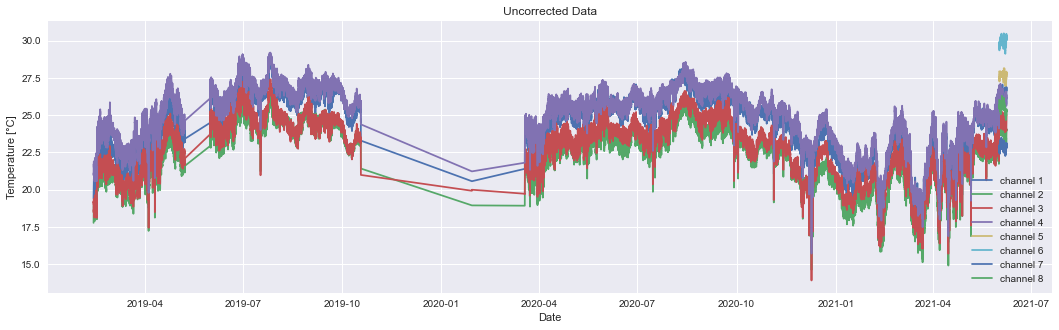

In [6]:
#plot data
length=15 # you can change it

plt.figure(figsize=(18,5))
for c in ["1","2","3","4","5","6","7","8"]:
    inde=data_all[c][length].index
    val=data_all[c][length].values
    plt.plot(inde,val, label=f"channel {c}")
plt.xlabel("Date")
plt.ylabel("Temperature [°C]")
plt.title("Uncorrected Data")
plt.legend(loc="lower right") # with large amount of data loc="best" can be slow

# Measurements per day plots
in meinem anderen Skript habe ich für jeden month noch einen extra key, ich müsste meine Funktionen hier anpassen.
Am einfachsten wäre es denke ich die Daten hier zu ändern nur für die Funktionen. Die Funktionen nehmen einiges an Platz ein, ich sollte die dann auch auslagern. Mache ich jetzt erstmal nicht.

# Checks

In [7]:
%%time
# Wall time: 53.2 s
# Data Check
if check == True:
    # number of nan
    for channel in data_all.keys():
        for column in data_all[channel].columns:
            n_nan=sum(data_all[channel][column].isna()) # number of nan in column
            if n_nan > 0:
                isna=data_all[channel][column].isna() # column with nan
                dates_isna=isna[isna == True].index
                print(f"number of nan values in channel {channel} at length {column}: {n_nan}")
                print("at the following dates:")
                print(dates_isna)
                print()


number of nan values in channel 3 at length 1314: 47583
at the following dates:
DatetimeIndex(['2019-07-24 11:00:09', '2019-07-24 11:16:10',
               '2019-07-24 11:32:10', '2019-07-24 11:48:11',
               '2019-07-24 12:04:12', '2019-07-24 12:20:13',
               '2019-07-24 12:36:13', '2019-07-24 12:52:14',
               '2019-07-24 13:08:15', '2019-07-24 13:24:15',
               ...
               '2021-06-08 05:25:07', '2021-06-08 05:57:08',
               '2021-06-08 06:29:10', '2021-06-08 07:01:11',
               '2021-06-08 07:33:13', '2021-06-08 08:05:14',
               '2021-06-08 08:37:15', '2021-06-08 09:09:17',
               '2021-06-08 09:41:18', '2021-06-08 10:13:20'],
              dtype='datetime64[ns]', name='Date', length=47583, freq=None)

Wall time: 52.7 s
